In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import tracemalloc
import time
import matplotlib.pyplot as plt


In [2]:
mh = '+0.0'
CtoO = '1.0'

filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso/reference/opacities/ck_cx_cont_opacities.db"
#filename_db="/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/reference/climate_INPUTS/ck_cx_cont_opacities_661.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m'+mh+'_co'+CtoO+'.data.196'
#ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)#, deq = True, first_deq = True)


In [3]:
# planet prop
semi_major = 0.05#0.0355 #"NA" # AU
T_eff = 200
grav = 25
r_planet = 1.00 # needed for vulcan photochem runs

### star prop
T_star = 6000.0#"NA"
logg = 4.4
metal = 0.0
r_star = 1.0




nlevel = 91
pressure=np.logspace(np.log10(1e-5),np.log10(4e3),nlevel)
temp_guess = np.zeros(shape=(nlevel)) 
kz = np.zeros(shape =(nlevel))


temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(1900)+"g31"+"nc_m0.0.dat",usecols=[2],unpack=True, skiprows = 1)

#for i in range(len(temp_guess)):
#    temp_guess[i] = 700
    

nofczns = 1
nstr = np.array([0,87,89,0,0,0])
rfacv = 0.5
rfaci =1.0
cloudy = False
fsed = 2
if cloudy == True:
    semi_major = str(semi_major)+"_cld_fsed"+str(fsed)



In [4]:
###### run start

cl_run = jdi.inputs(calculation="planet", climate = True)

cl_run.star(opacity_ck, temp =T_star,metal =metal, logg =logg, radius = r_star, radius_unit=u.R_sun,semi_major= semi_major , semi_major_unit = u.AU)#opacity db, pysynphot database, temp, metallicity, logg

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)





cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed, T_star = T_star, logg = logg, metal = metal, r_star = r_star, semi_major = semi_major)


t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final, df, all_profiles = cl_run.run_climate_model(opacity_ck,save_all_profiles=True,diseq_chem = False, self_consistent_kzz =False, kz = kz )
t1 = time.time()
print(t1-t0)


Iteration number  0 , min , max temp  841.4017855105727 4006.809533960821 , flux balance  299.1792571222502
Iteration number  1 , min , max temp  832.384627672425 5199.9 , flux balance  36.170854519619205
Iteration number  2 , min , max temp  832.1485864305325 5199.9 , flux balance  1.697722191716525
Iteration number  3 , min , max temp  832.1456580518686 5199.9 , flux balance  0.01228081247514433
Iteration number  4 , min , max temp  832.1456426492186 5199.9 , flux balance  5.810371035073758e-06
Converged Solution in iterations  4
Big iteration is  832.1456426492186 0
Iteration number  0 , min , max temp  832.1459032318863 5199.9 , flux balance  40.320735679182235
Converged Solution in iterations  0
Profile converged
Iteration number  0 , min , max temp  832.1461637747149 5199.9 , flux balance  40.31551160640424
Converged Solution in iterations  0
Big iteration is  832.1461637747149 0
Iteration number  0 , min , max temp  832.1464242782948 5199.9 , flux balance  40.31028823053491
Conv

In [3]:
path = "../../research/EGP_paper/array/"

df.to_csv(path+"200_25_0.05au_sun_planet_df",sep='\t')

NameError: name 'df' is not defined

In [4]:
import pandas as pd
path = "../../research/EGP_paper/array/"



df1 = pd.read_csv(path+"200_25_0.05au_sun_planet_df", sep='\t')

semi_major = 0.05#0.0355 #"NA" # AU
T_eff = 200
grav = 25
r_planet = 1.00 # needed for vulcan photochem runs

### star prop
T_star = 6000.0#"NA"
logg = 4.4
metal = 0.0
r_star = 1.0




bundle = jdi.inputs(calculation="planet",climate='True')

bundle.phase_angle(0)
bundle.gravity(gravity=grav , gravity_unit=u.Unit('m/s**2'))

bundle.star(opacity_ck, T_star,metal,logg,r_star,radius_unit = jdi.u.Unit('R_sun') )

bundle.guillot_pt(500, T_int=100, logg1=-1, logKir=-1.5, alpha=0.5, nlevel=91, p_bottom=1.5, p_top=-6)

for keys in df1.keys():
    bundle.inputs['atmosphere']['profile'][keys] = df1[keys]


In [5]:
from picaso.climate import  calculate_atm_deq, did_grad_cp, convec, calculate_atm, t_start, growdown, growup, climate
from picaso.fluxes import set_bb, tidal_flux

DTAU, TAU, W0, COSB,ftau_cld, ftau_ray,GCOS2, DTAU_OG, TAU_OG, W0_OG, COSB_OG, \
        W0_no_raman , surf_reflect, ubar0,ubar1,cos_theta, single_phase,multi_phase, \
        frac_a,frac_b,frac_c,constant_back,constant_forward, tridiagonal , \
        wno,nwno,ng,nt, nlevel, ngauss, gauss_wts, mmw =  calculate_atm(bundle, opacity_ck )


pressure,temp = df1['pressure'],df1['temperature']

extension = 0.3 
tmin = 52.0 #min_temp*(1-extension)
tmax = 5199 #max_temp*(1+extension)
dt = 2.5
ntmps = int((tmax-tmin)/dt)
delta_wno,dwni = opacity_ck.delta_wno,opacity_ck.delta_wno
wno = opacity_ck.wno
nwno = len(wno) 
bb , y2 , tp = set_bb(wno,delta_wno,nwno,ntmps,dt,tmin,tmax)

fine_flux_star = bundle.inputs['star']['flux']


radius_unit = jdi.u.Unit('R_sun')
semi_major_unit = jdi.u.Unit('AU')

r = (r_star*radius_unit).to(u.cm).value
semi_major = (semi_major*semi_major_unit).to(u.cm).value


FOPI = fine_flux_star * ((r/semi_major)**2)

flux_net_v_layer_full, flux_net_v_full, flux_plus_v_full, flux_minus_v_full , flux_net_ir_layer_full, flux_net_ir_full, flux_plus_ir_full, flux_minus_ir_full = climate(pressure, temp, dwni, bb , y2, tp, tmin, tmax, DTAU, TAU, W0, 
            COSB,ftau_cld, ftau_ray,GCOS2, DTAU_OG, TAU_OG, W0_OG, COSB_OG, W0_no_raman , surf_reflect, 
            ubar0,ubar1,cos_theta, FOPI, single_phase,multi_phase,frac_a,frac_b,frac_c,constant_back,constant_forward, tridiagonal , 
            wno,nwno,ng,nt, nlevel, ngauss, gauss_wts,True, True)






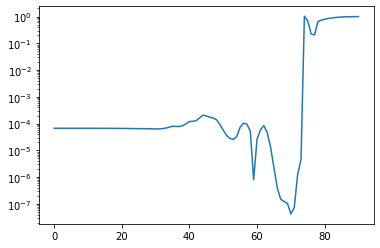

In [6]:
tidal = -0.56687e-4*(200**4)
diff = np.abs((flux_net_ir_layer_full+0.5*flux_net_v_layer_full[0][0]+tidal)/tidal)
plt.semilogy(diff)

In [7]:
path = "../../research/EGP_paper/array/"


np.save(path+"exo_200_25_0pt05_v_layer",flux_net_v_layer_full)
np.save(path+"exo_200_25_0pt05_v_level",flux_net_v_full)
np.save(path+"exo_200_25_0pt05_ir_layer",flux_net_ir_layer_full)
np.save(path+"exo_200_25_0pt05_ir_level",flux_net_ir_full)
